<a href="https://colab.research.google.com/github/Uma1709/EDA/blob/main/dev_excerise_7(geolocation_dataset_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 8.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 37.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 39.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 38.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 49.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 66.1 MB/s 
     |████████████████████████████████| 19.3 MB 1.1 MB/s 
     |███

In [ ]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/geolocation_data.csv')
df.head()

,name,country_id,country_code,country_name,state_code,latitude,longitude
0,Australian Capital Territory,14,AU,Australia,ACT,-35.473468,149.012368
1,New South Wales,14,AU,Australia,NSW,-31.253218,146.921099
2,Northern Territory,14,AU,Australia,NT,-19.491411,132.550960
3,Queensland,14,AU,Australia,QLD,-20.917574,142.702796
4,South Australia,14,AU,Australia,SA,-30.000232,136.209155


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8 non-null      object 
 1   country_id    8 non-null      int64  
 2   country_code  8 non-null      object 
 3   country_name  8 non-null      object 
 4   state_code    8 non-null      object 
 5   latitude      8 non-null      float64
 6   longitude     8 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 576.0+ bytes


In [ ]:
df_geo=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))
df_geo.head()

,name,country_id,country_code,country_name,state_code,latitude,longitude,geometry
0,Australian Capital Territory,14,AU,Australia,ACT,-35.473468,149.012368,POINT (149.01237 -35.47347)
1,New South Wales,14,AU,Australia,NSW,-31.253218,146.921099,POINT (146.92110 -31.25322)
2,Northern Territory,14,AU,Australia,NT,-19.491411,132.550960,POINT (132.55096 -19.49141)
3,Queensland,14,AU,Australia,QLD,-20.917574,142.702796,POINT (142.70280 -20.91757)
4,South Australia,14,AU,Australia,SA,-30.000232,136.209155,POINT (136.20915 -30.00023)


In [ ]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

india = world.loc[world['name'] == 'Australia'] # get Singapore row
boundaries = india['geometry'] # get Singapore geometry
print(boundaries)
print(india)
world.head()

137    MULTIPOLYGON (((147.68926 -40.80826, 148.28907...
Name: geometry, dtype: geometry
      pop_est continent       name iso_a3  gdp_md_est  \
137  23232413   Oceania  Australia    AUS   1189000.0   

                                              geometry  
137  MULTIPOLYGON (((147.68926 -40.80826, 148.28907...  


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Text(0.5, 1.0, 'Australia')

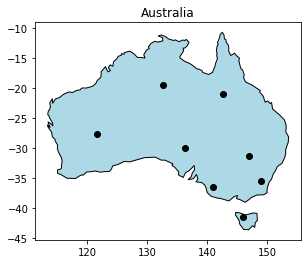

In [ ]:
axis=world.loc[world['name'] == 'Australia'].plot(
color='lightblue',edgecolor='black')

df_geo.plot(ax=axis , color='black')
plt.title('Australia')

AxesSubplot(0.264301,0.125;0.496397x0.755)


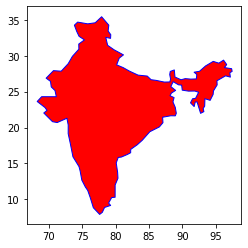

In [ ]:
axis=world.loc[world['name'] == 'India'].plot(
color='#ff0000',edgecolor='#0000ff')
print(axis)

AxesSubplot(0.157481,0.125;0.710038x0.755)


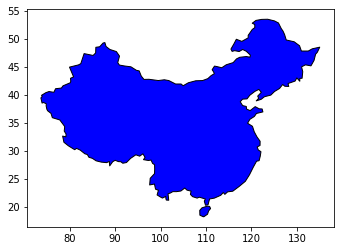

In [ ]:
axis=world.loc[world['name'] == 'China'].plot(
color='#0000ff',edgecolor='black')
print(axis)

AxesSubplot(0.406381,0.125;0.212238x0.755)


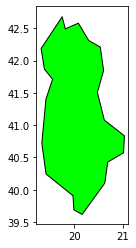

In [ ]:
axis=world.loc[world['name'] == 'Albania'].plot(
color='#00ff00',edgecolor='black')
print(axis)